In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv")
print('Total de linhas e colunas\n\n',df.shape, '\n')

Total de linhas e colunas

 (284807, 31) 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe().round()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,...,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0,284807.0
mean,94814.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,...,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,88.0,0.0
std,47488.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,250.0,0.0
min,0.0,-56.0,-73.0,-48.0,-6.0,-114.0,-26.0,-44.0,-73.0,-13.0,...,-35.0,-11.0,-45.0,-3.0,-10.0,-3.0,-23.0,-15.0,0.0,0.0
25%,54202.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-1.0,...,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,6.0,0.0
50%,84692.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,22.0,0.0
75%,139320.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0
max,172792.0,2.0,22.0,9.0,17.0,35.0,73.0,121.0,20.0,16.0,...,27.0,11.0,23.0,5.0,8.0,4.0,32.0,34.0,25691.0,1.0


In [5]:
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 0].describe(),2))
print ()
print ()
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2))
print ()
print (round(df.Amount[df.Class == 1].describe(),2))

Non Fraud %  99.83

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64


Fraud %     0.17

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64


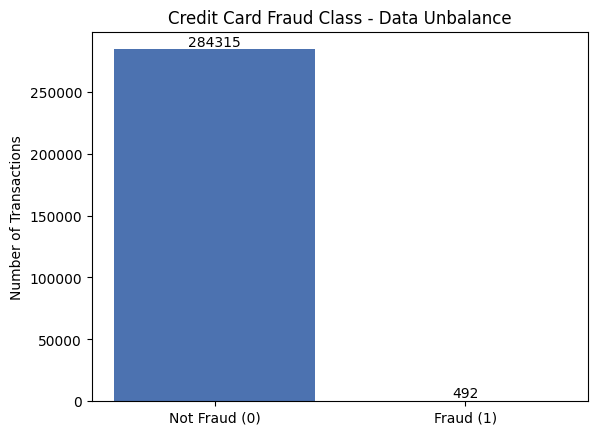

In [6]:
# checando se os dados são desbalanceados em relação coluna class (que diz se é ou não uma fraude)
import matplotlib.pyplot as plt

counts = df['Class'].value_counts()
labels = ['Not Fraud (0)', 'Fraud (1)']

bars = plt.bar(labels, counts, color=['#4c72b0', '#dd8452'])
plt.title("Credit Card Fraud Class - Data Unbalance")
plt.ylabel("Number of Transactions")

# Adicionando os valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 100, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()

In [7]:
print ('Non Fraud % ',round(df['Class'].value_counts()[0]/len(df)*100,2))
print ('Fraud %    ',round(df['Class'].value_counts()[1]/len(df)*100,2));

Non Fraud %  99.83
Fraud %     0.17


In [8]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1, 30:].columns


data_features = df[feature_names]
data_target = df[target]

In [9]:
feature_names

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [10]:
target

Index(['Class'], dtype='object')

In [11]:
xg = xgb.XGBClassifier()

In [12]:
from sklearn.model_selection import train_test_split
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, 
                                                    train_size = 0.70, test_size = 0.30, random_state = 1)

In [13]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt


In [15]:
def PrintStats(cmat, y_test, pred):
    tpos = cmat[0][0]
    fneg = cmat[1][1]
    fpos = cmat[0][1]
    tneg = cmat[1][0]

In [16]:
def RunModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train.values.ravel())
    pred = model.predict(X_test)
    matrix = confusion_matrix(y_test, pred)
    return matrix, pred

In [17]:
cmat, pred = RunModel(xg, X_train, y_train, X_test, y_test)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

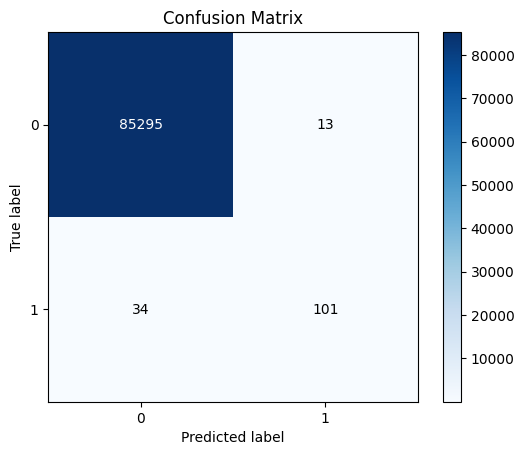

In [18]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [19]:
accuracy_score(y_test, pred)

0.9994499256814484

In [20]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.89      0.75      0.81       135

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



In [21]:
# The function "len" counts the number of classes = 1 and saves it as an object "fraud_records"
fraud_records = len(df[df.Class == 1]) 

# Defines the index for fraud and non-fraud in the lines:
fraud_indices = df[df.Class == 1].index
normal_indices = df[df.Class == 0].index

# Randomly collect equal samples of each type:
under_sample_indices = np.random.choice(normal_indices, fraud_records, False)
df_undersampled = df.iloc[np.concatenate([fraud_indices, under_sample_indices]),:]
X_undersampled = df_undersampled.iloc[:,1:30]
Y_undersampled = df_undersampled.Class
X_undersampled_train, X_undersampled_test, Y_undersampled_train, Y_undersampled_test = train_test_split(X_undersampled, Y_undersampled, test_size = 0.30)

In [22]:
xg_undersampled = xgb.XGBClassifier() 
cmat, pred = RunModel(xg_undersampled, X_undersampled_train, Y_undersampled_train, X_undersampled_test, Y_undersampled_test)
PrintStats(cmat, Y_undersampled_test, pred)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

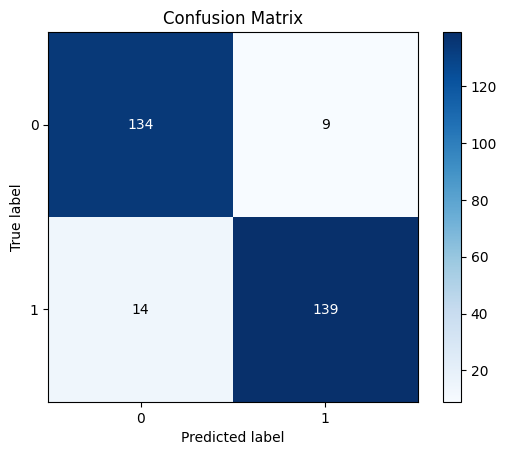

In [23]:
skplt.metrics.plot_confusion_matrix(Y_undersampled_test, pred)

In [ ]:
accuracy_score(Y_undersampled_test, pred)

In [24]:
print (classification_report(Y_undersampled_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       143
           1       0.94      0.91      0.92       153

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



A acurácia diminuiu, mas a sensibilidade aumentou significativamente. Observando a matriz de confusão, podemos ver uma porcentagem muito maior de classificações corretas dos dados fraudulentos.

Infelizmente, um maior número de classificações como fraude quase sempre significa um número correspondente maior de transações válidas também classificadas como fraudulentas.



### Usando o 'novo' classificador no teste com os dados originais

In [25]:
xg = xgb.XGBClassifier() 
cmat, pred = RunModel(xg, X_undersampled_train, Y_undersampled_train, X_test, y_test)
PrintStats(cmat, y_test, pred)

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

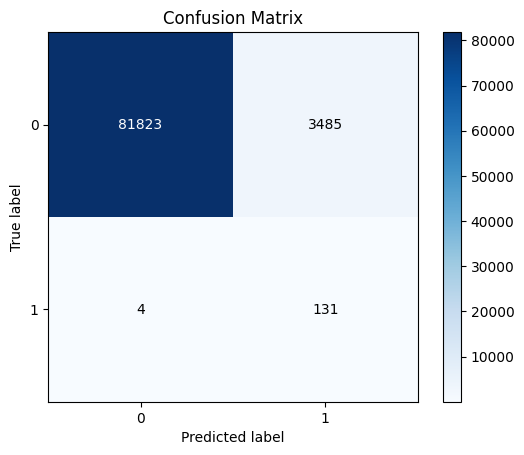

In [26]:
skplt.metrics.plot_confusion_matrix(y_test, pred)

In [27]:
accuracy_score(y_test, pred)

0.9591657596292265

In [28]:
print (classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85308
           1       0.04      0.97      0.07       135

    accuracy                           0.96     85443
   macro avg       0.52      0.96      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [29]:
from sklearn import metrics        

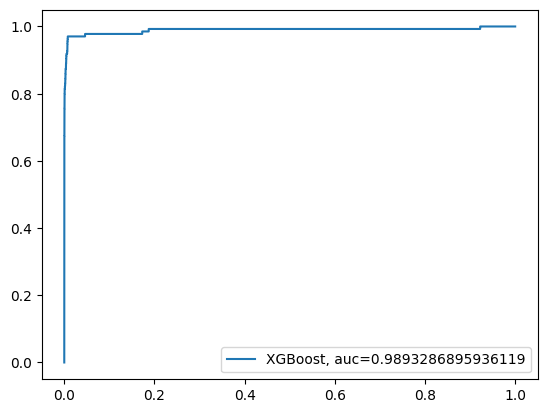

In [30]:
# Creating XGBoost model
clf = xgb.XGBClassifier()
clf.fit(X_undersampled_train, Y_undersampled_train)
y_pred = clf.predict(X_test)

# AUC Curve XGBoost
y_pred_probability = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_probability)
auc = metrics.roc_auc_score(y_test, y_pred_probability)
plt.plot(fpr,tpr,label="XGBoost, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:
booster = clf.get_booster()
booster.save_model("fraud_detection_model_v1.model")

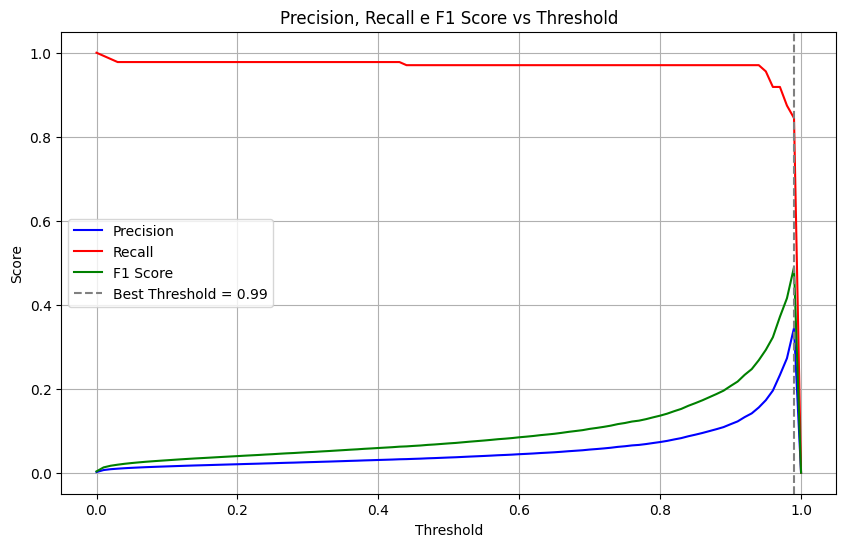

In [33]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np
import matplotlib.pyplot as plt

# Obtem as probabilidades previstas da classe positiva
y_scores = clf.predict_proba(X_test)[:, 1]

thresholds = np.arange(0.0, 1.01, 0.01)
precisions = []
recalls = []
f1_scores = []

for t in thresholds:
    y_pred_thresh = (y_scores >= t).astype(int)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_thresh, average='binary')
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# Encontrar o melhor threshold com base no maior F1 Score
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]

# Plotando
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label='Precision', color='blue')
plt.plot(thresholds, recalls, label='Recall', color='red')
plt.plot(thresholds, f1_scores, label='F1 Score', color='green')
plt.axvline(x=best_threshold, color='gray', linestyle='--', label=f'Best Threshold = {best_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall e F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.show()
